In [1]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
soup = requests.get(url)
soup

C:\Users\Aayush\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
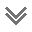

In [2]:
soup = soup.text
code = BeautifulSoup(soup, "lxml")
code

In [3]:
table_code = code.table
table_code

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [4]:
tags = table_code.find_all('tr')
tags

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [5]:
data = []
for tag in tags[1:]:
    data.append(tag.get_text().replace(',','').split('\n')[1:-1][0:22])



column = tags[0].get_text().replace(',','').split('\n')[1:-1]
all_data = column+data
all_data

['#',
 'CountryOther',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'SeriousCritical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/',
 '1M pop',
 '',
 'Population',
 'Continent',
 '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop',
 ['',
  '',
  'North America',
  '',
  '114689858',
  '+990',
  '1526246',
  '+5',
  '108543243',
  '+7154',
  '4620369',
  '9090',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '',
  '',
  '',
  ''],
 ['',
  '',
  'Asia',
  '',
  '184930441',
  '+178531',
  '1469909',
  '+419',
  '176885103',
  '+396540',
  '6575429',
  '12500',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '',
  '',
  '',
  ''],
 ['',
  '',
  'Europe',
  '',
  '222300900',
  '+46861',
  '1904865',
  '+104',
  '216280647',
  '+125424',
  '4115388',
  '9103',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '',
  '',
  '',
  ''],
 ['',
  ''

In [6]:
len(data[0])

22

In [7]:
import csv
with open('covid_data1.csv','w') as file:
    x = csv.writer(file)
    x.writerows(all_data)


In [8]:
import pandas as pd
df = pd.read_csv('covid_data1.csv', encoding = 'ISO-8859-1')
df

ParserError: Error tokenizing data. C error: Expected 12 fields in line 13, saw 14


In [ ]:
import pandas as pd
df = pd.read_csv('covid_data1.csv', encoding = 'ISO-8859-1')
df.iloc[8:-8].to_csv('covid_data1.csv')


In [ ]:
import pandas as pd
df = pd.read_csv('covid_data1.csv')
df

In [ ]:
df['#']

In [1]:
pwd

'C:\\Users\\Aayush\\python4pm'